In [104]:
import pandas as pd
import numpy as np
import seaborn as sbs
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import r2_score
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score
%matplotlib inline
from  matplotlib.ticker import PercentFormatter

In [3]:
from my_modul import *  

In [4]:
data = pd.read_csv('autos.csv', encoding="ISO-8859-1")


In [5]:
data = data[:10000]
data.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,NaN,1993,manuell,0,golf,150000,0,benzin,volkswagen,NaN,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
1,2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,NaN,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2,2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,NaN,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46
3,2016-03-17 16:54:04,GOLF_4_1_4__3TÜRER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,golf,150000,6,benzin,volkswagen,nein,2016-03-17 00:00:00,0,91074,2016-03-17 17:40:17
4,2016-03-31 17:25:20,Skoda_Fabia_1.4_TDI_PD_Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,fabia,90000,7,diesel,skoda,nein,2016-03-31 00:00:00,0,60437,2016-04-06 10:17:21


In [7]:
data.describe()

,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,nrOfPictures,postalCode
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0,10000.000000
mean,5817.501800,2003.503400,113.597700,125434.000000,5.732800,0.0,50688.451600
std,10035.521164,11.699413,106.623799,40231.436724,3.717901,0.0,25852.917457
min,0.000000,1111.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1150.000000,1999.000000,69.000000,100000.000000,3.000000,0.0,30419.000000
50%,2990.000000,2003.500000,106.500000,150000.000000,6.000000,0.0,49477.000000
75%,7299.000000,2008.000000,150.000000,150000.000000,9.000000,0.0,71229.000000
max,579000.000000,2018.000000,7515.000000,150000.000000,12.000000,0.0,99986.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
dateCrawled            10000 non-null object
name                   10000 non-null object
seller                 10000 non-null object
offerType              10000 non-null object
price                  10000 non-null int64
abtest                 10000 non-null object
vehicleType            8914 non-null object
yearOfRegistration     10000 non-null int64
gearbox                9446 non-null object
powerPS                10000 non-null int64
model                  9479 non-null object
kilometer              10000 non-null int64
monthOfRegistration    10000 non-null int64
fuelType               9068 non-null object
brand                  10000 non-null object
notRepairedDamage      8037 non-null object
dateCreated            10000 non-null object
nrOfPictures           10000 non-null int64
postalCode             10000 non-null int64
lastSeen               10000 non-null object
dtyp

In [12]:
columns = data.columns

for column in columns:
    if (any(data[column].isna())):
        print(column)
        print()
#Nan values in columns: 

vehicleType

gearbox

model

fuelType

notRepairedDamage



In [16]:
#fill_na(data_to_fill, fill = "mode")
col_to_fill = ["vehicleType","gearbox","model","fuelType","notRepairedDamage"]
data_to_fill = data[col_to_fill]

In [17]:
for col in data_to_fill.columns:
    tmp = data_to_fill[col].mode()[0]
    print(tmp)
    for i in range(len(data_to_fill[col])):
        if pd.isnull(data_to_fill.loc[i, col]):
            data_to_fill.loc[i, col] = tmp

limousine


C:\Users\MirolsavPC\Anaconda3\lib\site-packages\pandas\core\indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\MirolsavPC\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


manuell
golf
benzin
nein


In [18]:
data[col_to_fill] = data_to_fill[col_to_fill]

In [19]:
data['notRepairedDamage'] = data['notRepairedDamage'].replace('nein',0)
data['notRepairedDamage'] = data['notRepairedDamage'].replace('ja',1)

C:\Users\MirolsavPC\Anaconda3\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


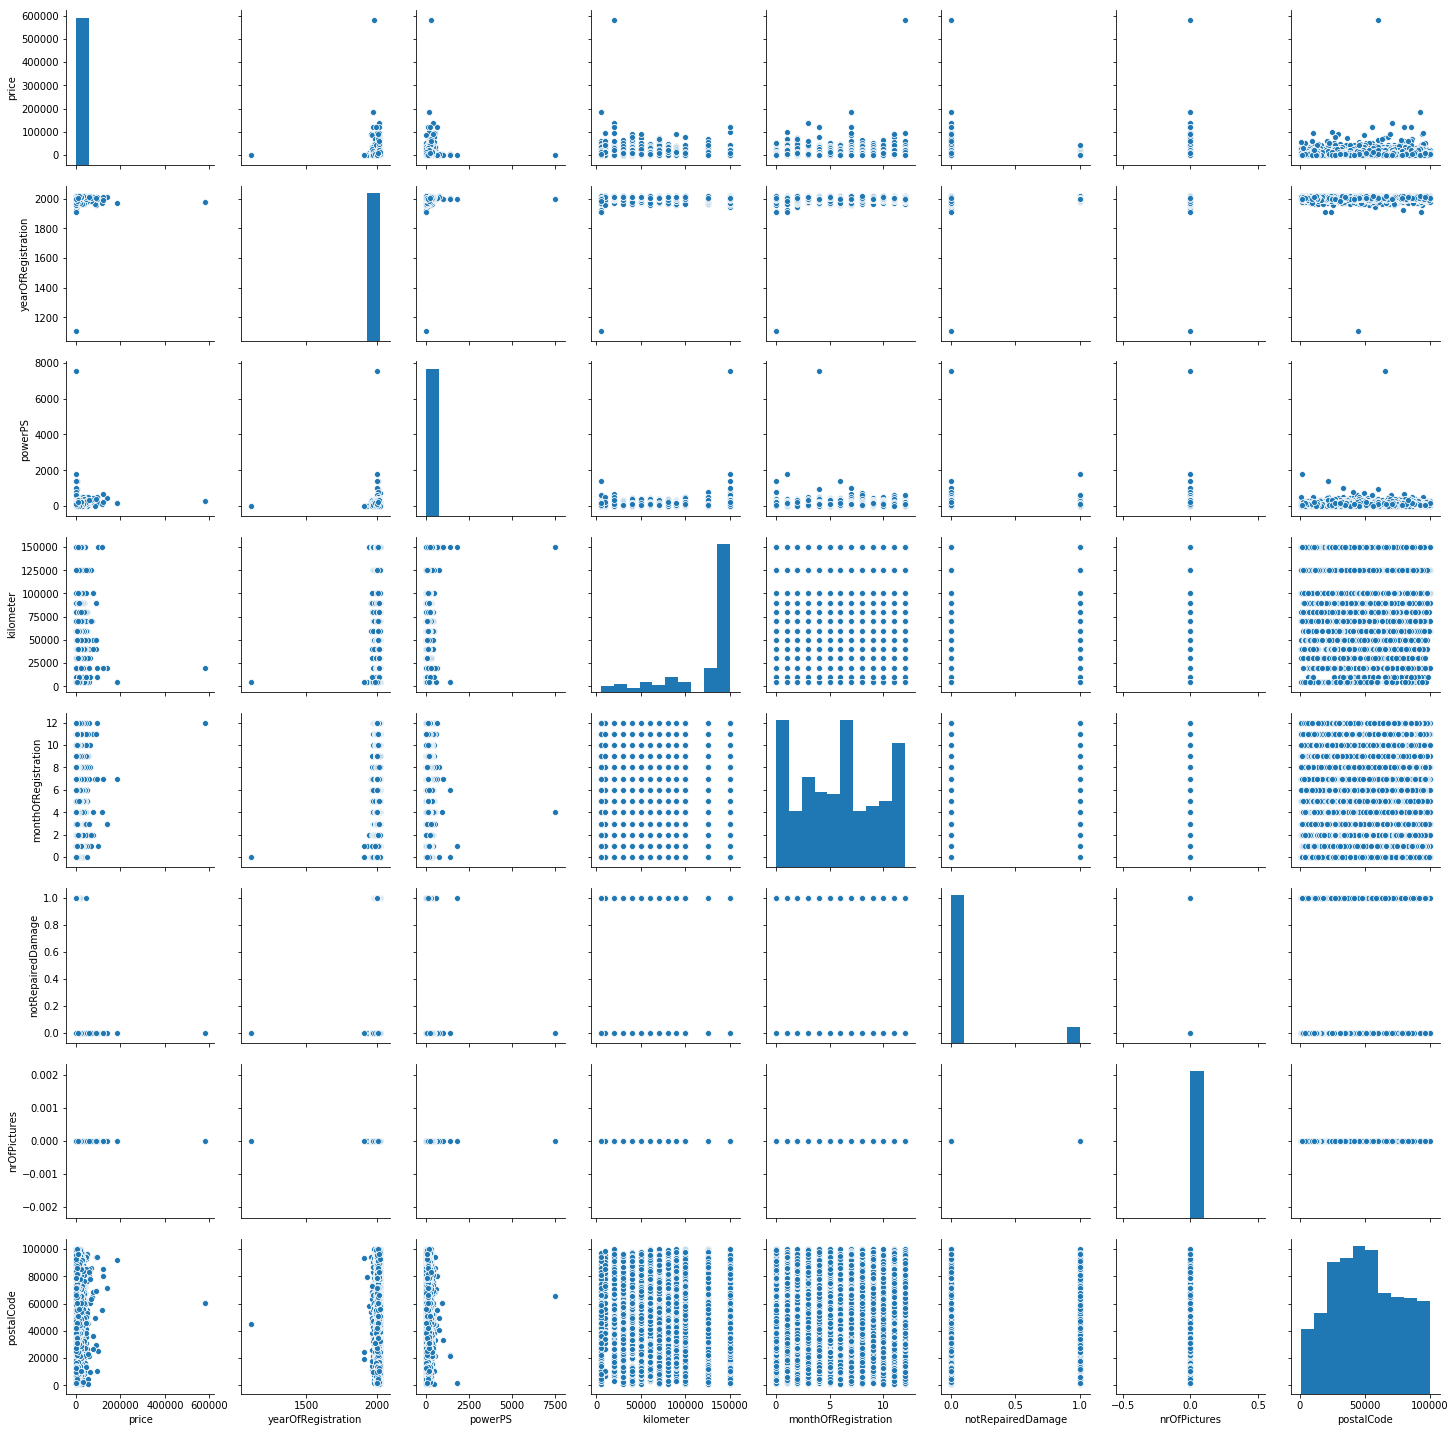

In [20]:
sbs.pairplot(data, size=2.5);

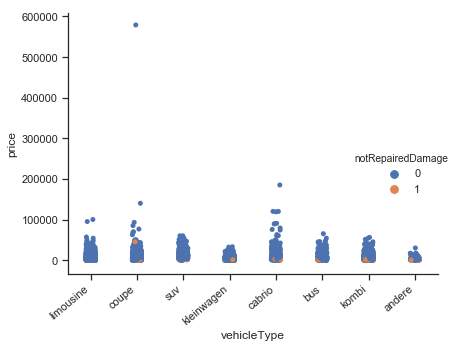

In [51]:
sbs.set(style="ticks")
g = sbs.catplot(x="vehicleType", y="price", hue="notRepairedDamage", data=data)
g.set_xticklabels( rotation=40, ha="right")
plt.tight_layout()
plt.show()

# Box plots

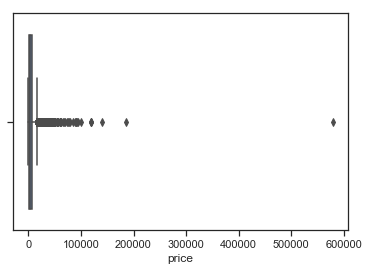

In [54]:
sbs.boxplot(x=data['price'])

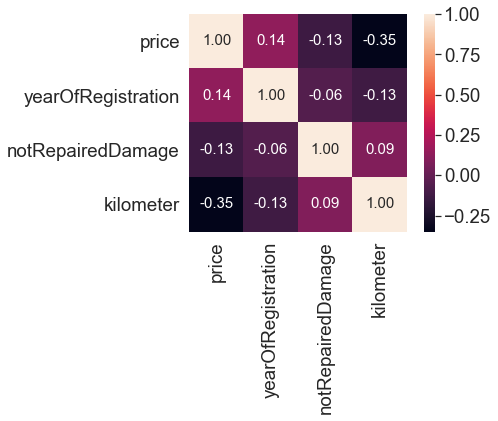

In [56]:
cols = ['price','yearOfRegistration','notRepairedDamage','kilometer']
cm = np.corrcoef(data[cols].values.T)
sbs.set(font_scale = 1.7)
hm = sbs.heatmap(cm,cbar = True, annot = True,square = True, fmt = '.2f', annot_kws = {'size':15}, yticklabels = cols, xticklabels = cols)

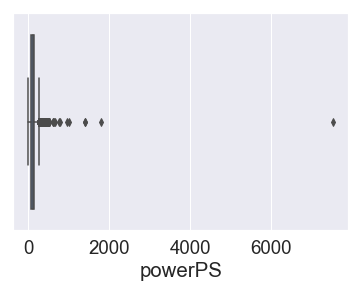

In [59]:
sbs.boxplot(x=data['powerPS'])

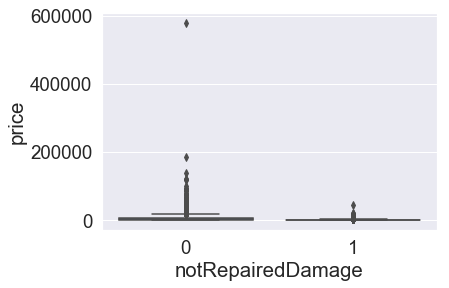

In [64]:
ax = sbs.boxplot(x="notRepairedDamage", y="price", data=data)

In [70]:
col_sc = ["yearOfRegistration", "kilometer", "postalCode"]
rs = RobustScaler(with_centering=True, with_scaling=True, quantile_range=(25.0, 75.0))
data[col_sc] = rs.fit_transform(data[col_sc])

Encoding

In [99]:
categorial = ["brand","vehicleType","notRepairedDamage"]
le = preprocessing.LabelEncoder()
for col in categorial:
    le.fit(data[col].unique())
    data[col]=le.transform(data[col])


In [100]:
data.head()
col_pred=["yearOfRegistration", "kilometer", "postalCode","powerPS","brand","vehicleType","notRepairedDamage"]

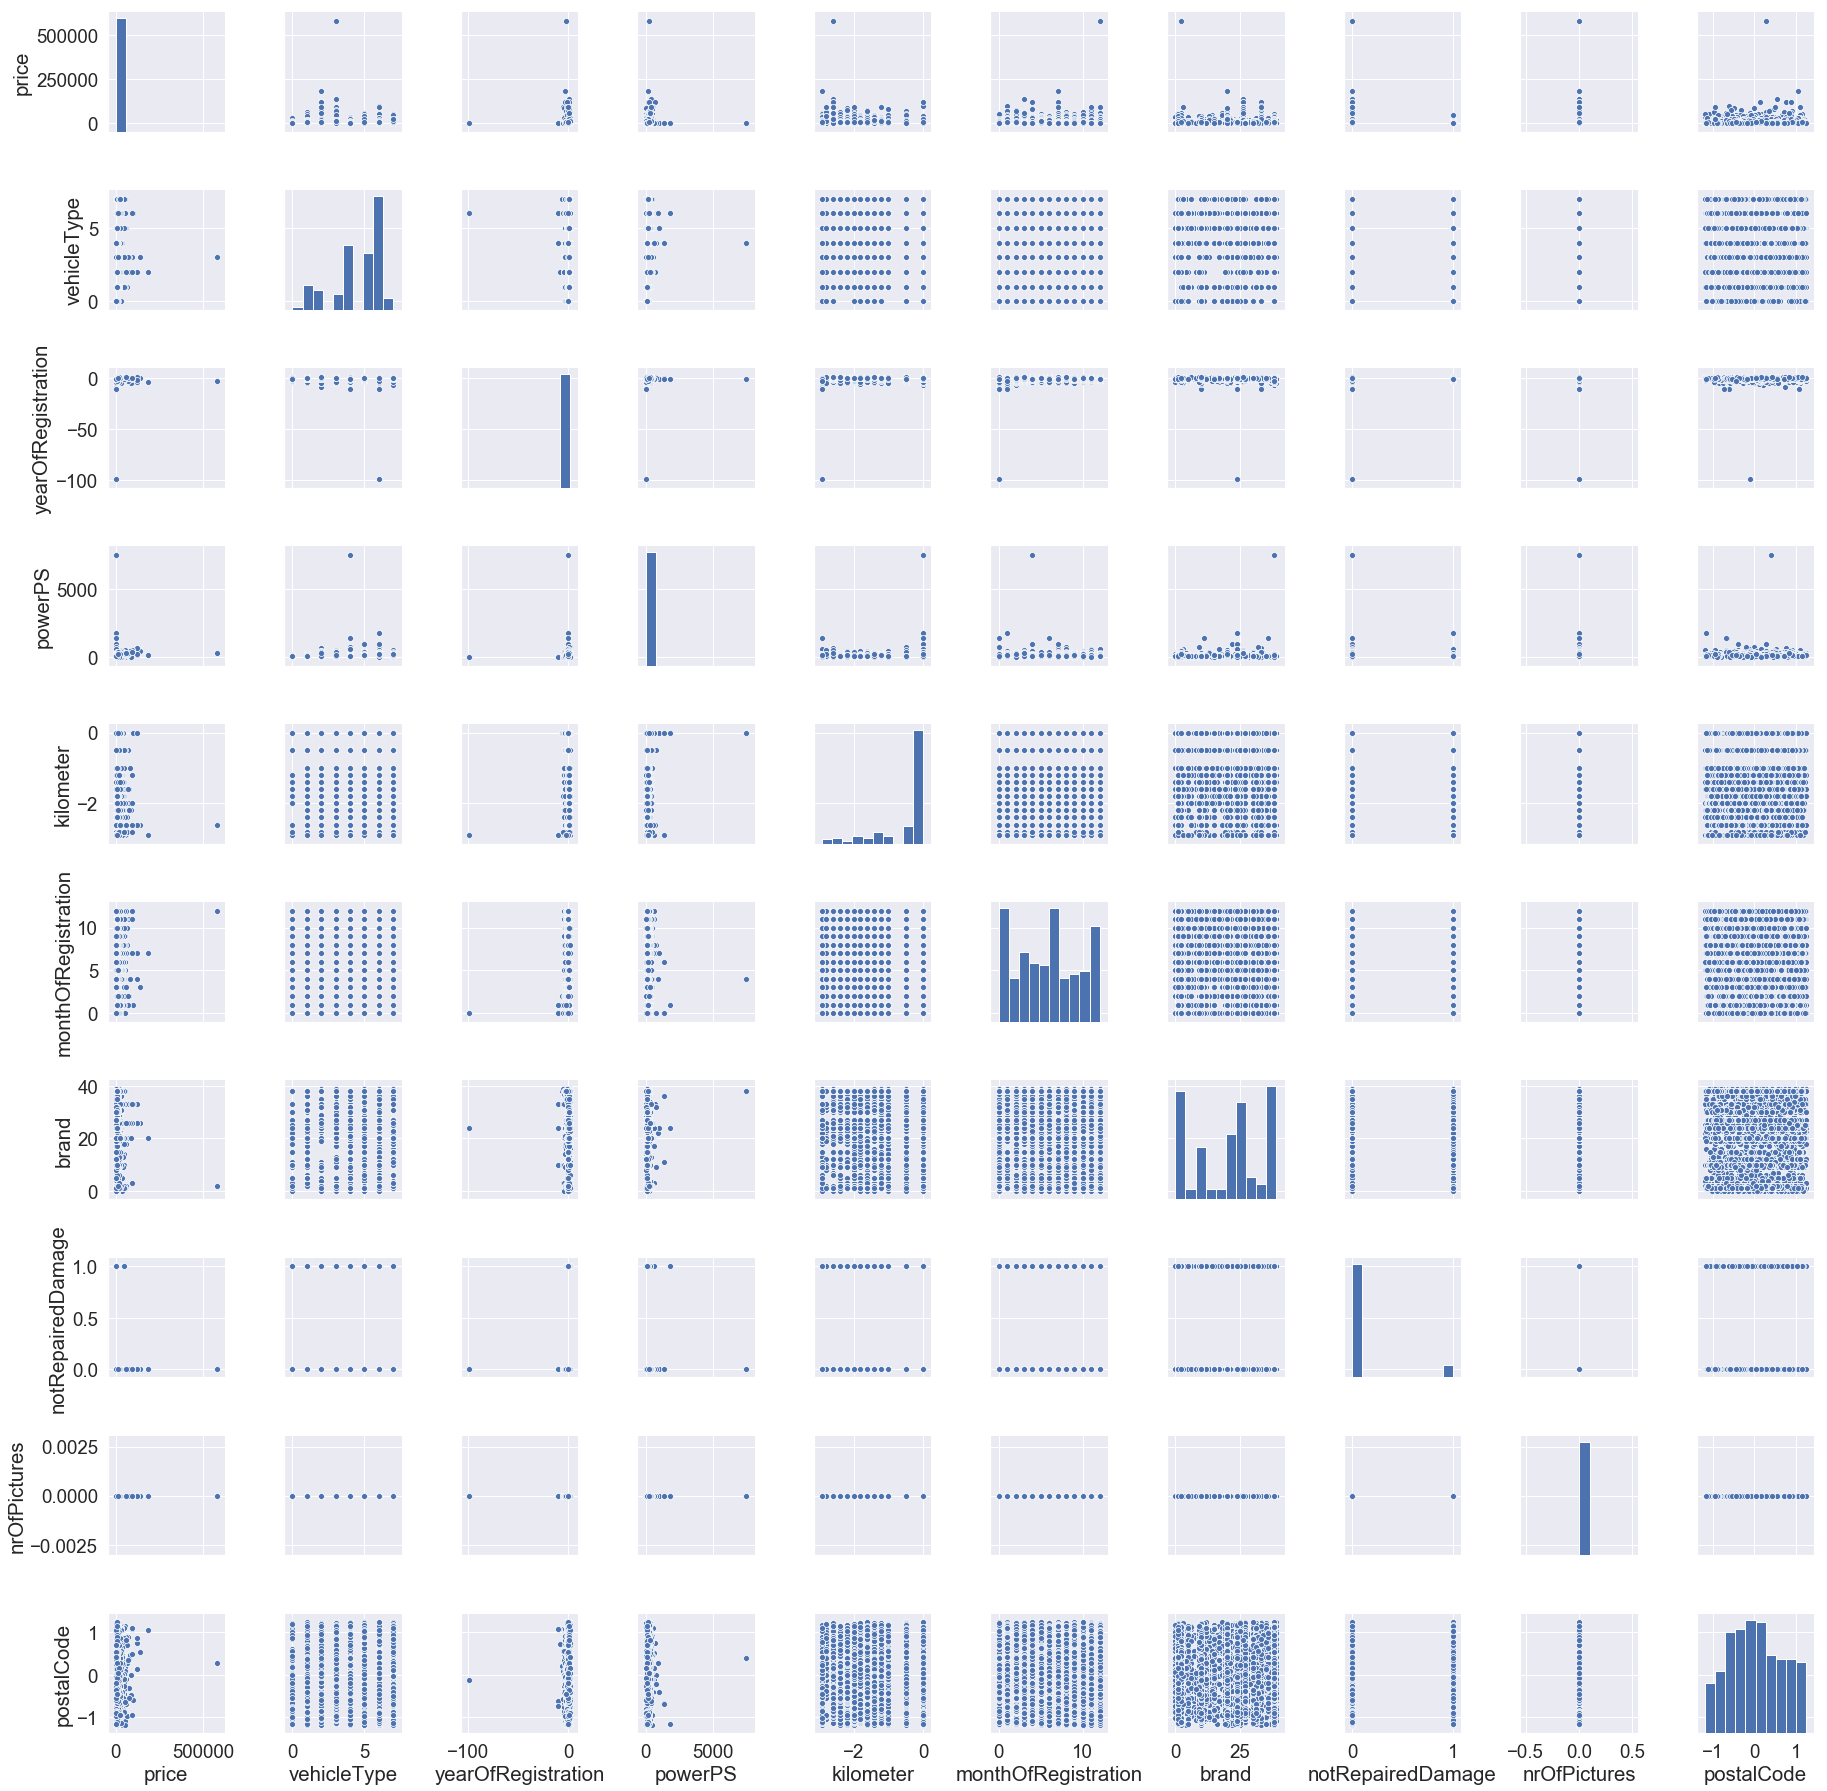

In [98]:
sbs.pairplot(data)

In [101]:
X_train, X_test, y_train, y_test = train_test_split(data[col_pred], data["price"], test_size=0.2, shuffle=True, random_state=0)

In [111]:
LR = LinearRegression()
LS = Lasso(alpha=0.001)
RR = Ridge(alpha=0.0001)
EL = ElasticNet(alpha=0.0001, l1_ratio=0)
SGD = SGDRegressor(alpha=0.0001, max_iter=10000000, tol=0.001, shuffle=True, epsilon=0.01, random_state=333)

models = [LR, RR, EL, SGD, LS]
titles = ['Linear Regression', 'Ridge', 'ElasticNet', 'SGDRegressor', 'Lasso']

In [112]:
print('      Model                 R-squared score')
for i in range(len(models)):
    scores = cross_val_score(models[i], X_train, y_train, cv=13, scoring='r2')
    print(f"{titles[i]:17}:    {scores.mean():10} (+/- {scores.std() * 2})")

      Model                 R-squared score
Linear Regression:    0.2728898583045696 (+/- 0.28022476508403094)
Ridge            :    0.2728898589970654 (+/- 0.28022476762315734)


C:\Users\MirolsavPC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MirolsavPC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MirolsavPC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\MirolsavPC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

ElasticNet       :    0.2728949570947905 (+/- 0.2802434913302707)
SGDRegressor     :    -2.5788674102647066e+18 (+/- 2.3973097450859556e+18)
Lasso            :    0.2728899093724972 (+/- 0.28022476704149957)


C:\Users\MirolsavPC\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [ ]:
#Все модели показали не высокий скор р2 . Дмаю это связанно  низкой корреляцией наших данных. Также дополнительная обработка данных может улучшить скор